In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



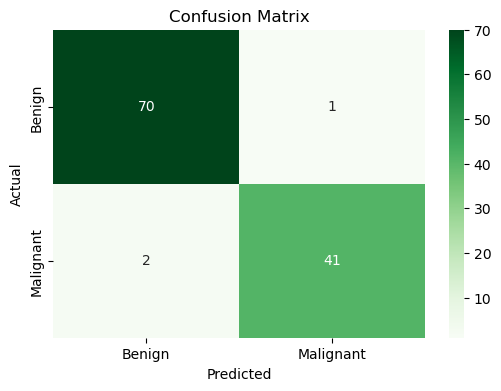

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

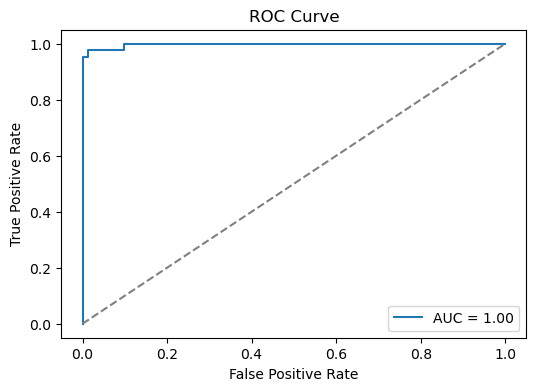

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1] #Probability estimates for class 1 (malignant)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_scaled, y)

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_new, y, test_size=0.2, random_state=42)

model_fs = LogisticRegression()
model_fs.fit(X_train_fs, y_train_fs)

LogisticRegression()

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", scores.mean())

Cross-validated accuracy: 0.9806862288464524


In [19]:
import numpy as np

coefficients = model.coef_[0]
feature_names = df.drop('diagnosis', axis=1).columns

for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")

radius_mean: 0.4346
texture_mean: 0.3972
perimeter_mean: 0.3961
area_mean: 0.4700
smoothness_mean: 0.0674
compactness_mean: -0.5267
concavity_mean: 0.8077
concave points_mean: 1.1077
symmetry_mean: -0.2415
fractal_dimension_mean: -0.0784
radius_se: 1.2506
texture_se: -0.1890
perimeter_se: 0.5899
area_se: 0.9199
smoothness_se: 0.3166
compactness_se: -0.6691
concavity_se: -0.1711
concave points_se: 0.3143
symmetry_se: -0.5050
fractal_dimension_se: -0.6118
radius_worst: 0.8739
texture_worst: 1.3575
perimeter_worst: 0.5860
area_worst: 0.8380
smoothness_worst: 0.5474
compactness_worst: -0.0059
concavity_worst: 0.9517
concave points_worst: 0.7804
symmetry_worst: 1.1956
fractal_dimension_worst: 0.1629
